### R/T Coefficients test

In [8]:
from marppss.forward import create_D_from_model
from marppss.util import PSVRTmatrix, SHmatrix

# rayp = 10.13/59.1579
rayp = 4.84/59.1579

m1 = [3.8, 2.2, 2200*0.8]
m2 = [6.0, 3.3, 3300*0.8]
mf = [0.001, 0.001, 8]

_, _, _, _, TppD, _, _, _    = PSVRTmatrix(rayp ,m1, m2)
RppU, _, _, _, TppU, _, _, _ = PSVRTmatrix(rayp ,m2, m1)
amp_PP = - RppU / (TppU * TppD)

_, TssD    = SHmatrix(rayp ,m1, m2)
RssU, TssU = SHmatrix(rayp ,m2, m1)
amp_SS = - RssU / (TssU * TssD)

print(f"PdP/PP = {amp_PP}, SdS/SS = {amp_SS}")

Rssf, _    = SHmatrix(rayp ,m1, mf)
print(f"Free surface SH reflection Rssf = {Rssf}")

Rppf,_,Rssf,_,_,_,_,_   = PSVRTmatrix(rayp ,m1, mf)
print(f"Free surface P reflection Rppf = {Rppf}")
print(f"Free surface SV reflection Rppf = {Rssf}")

PdP/PP = 0.3585498370433216, SdS/SS = -0.19680090949054838
Free surface SH reflection Rssf = 0.9908006617435565
Free surface P reflection Rppf = -0.8515082033557319
Free surface SV reflection Rppf = 0.8515063076737744


In [3]:
from marppss.util import PSVRTmatrix, SHmatrix

rayp = 6/111

m1 = [6.3, 3.6, 3600*0.8]
m2 = [8.1, 4.5, 4500*0.8]
mf = [0.001, 0.001, 8]

Rppf, _, _, _, _, _, _, _    = PSVRTmatrix(rayp ,m1, mf)
RppD, _, _, _, _, _, _, _    = PSVRTmatrix(rayp ,m1, m2)

amp_PpP = Rppf * RppD

print(amp_PpP)

-0.1668673669583238


### prep_data function test

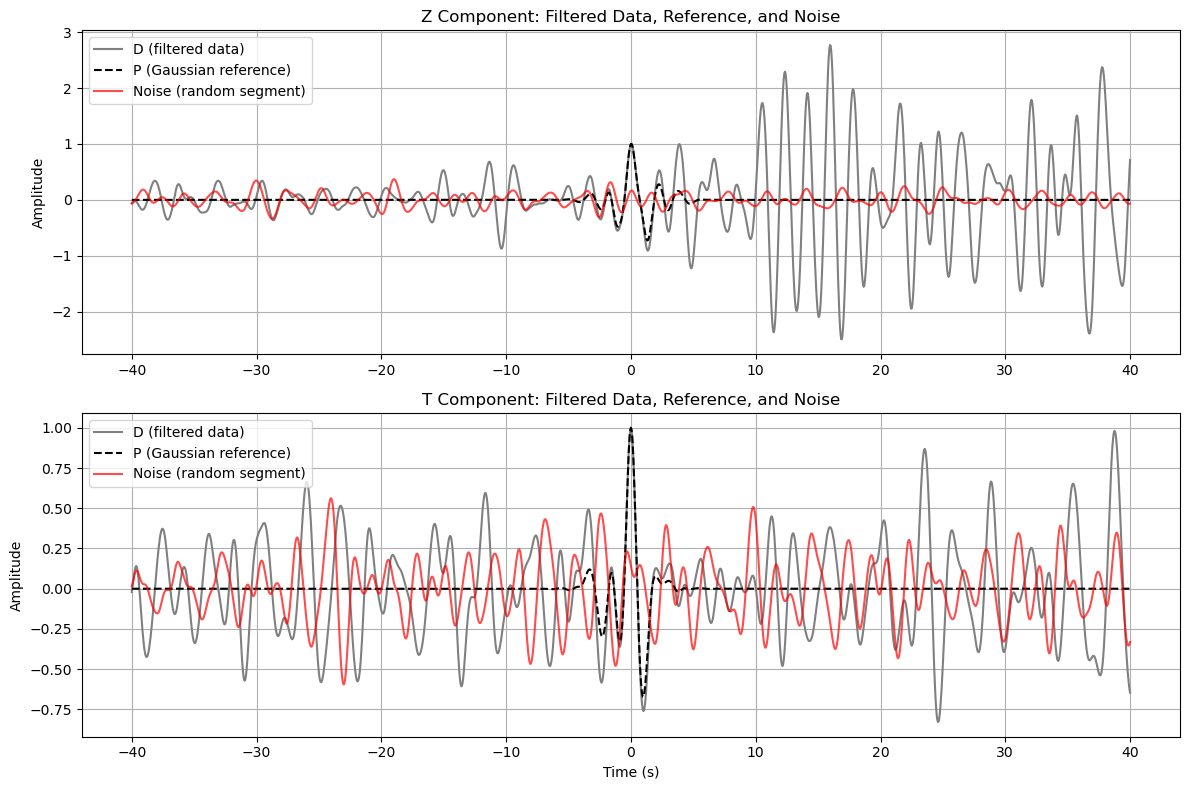

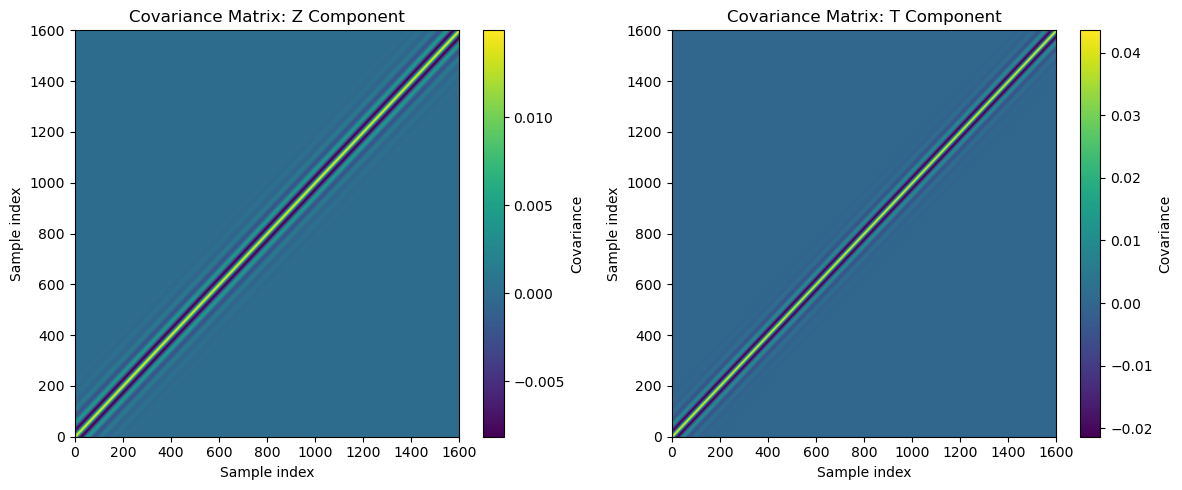

In [1]:
from marppss.util import prep_data
from obspy import UTCDateTime
import os

# basedir = "H:\My Drive\Research"
basedir = "/Users/evanzhang/zzq@umd.edu - Google Drive/My Drive/Research"

evname = "S1000a"
dtype = "VEL"

datadir = os.path.join(basedir, "SharpSSPy", "misc", evname)
outdir  = os.path.join(basedir, "MarPPSS")

PPfreq = (0.2, 0.6)
SSfreq = (0.2, 0.6)
cutwin = (-40, 40)

# S0976a
PParr = UTCDateTime("2021-09-18T18:01:48.360")
SSarr = UTCDateTime("2021-09-18T18:14:04.560")

src_sigma = 2.0

prep_data(
        datadir, outdir, evname, dtype, 
        PPfreq, SSfreq, PParr, SSarr, cutwin, src_sigma,
        rotated=True, baz=None)